<a href="https://colab.research.google.com/github/Ayushyash24/Machine_Learning/blob/main/Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Outliers: Outliers are data points that are significantly different from the majority of the data. They lie far away from the normal pattern or distribution.**

**When is ouliers dangerous?
Outliers are dangerous when they significantly affect statistical measures, distort model training, bias predictions, and reduce accuracy, especially in small datasets and distance-based or mean-based algorithms.**

**Effect of outliers on ml algos:

   outliers create a huge impact on ml algos that depends on weights such as linear regression, logistic regression, adaboost and deep learning
   
   
   ouliers does not create much effect on tree based algo such as decision tree **

# How to treat outliers

**1 ..  Trimming : Jo bhi outliers dataset me presenet hai unko hata do .Lkin isases data set thinning hoti hai yani data set kam ho ja ta hai.

----------------------------2...   Capping : min aur maximium range decide kar do dataset ka (critical points maanlo)


---------------------------
3 ....  missing values ke tarah outliers ko treat krlo
**

# How to detect outliers.

1. Normal distribution:
   

   agr hamara outliers (neu + 3sigma)> ho ya (neu - 3sigma) se chota ho aur humara data normally ya closed to normal distribution ho.



  2. skewed outliers
  
   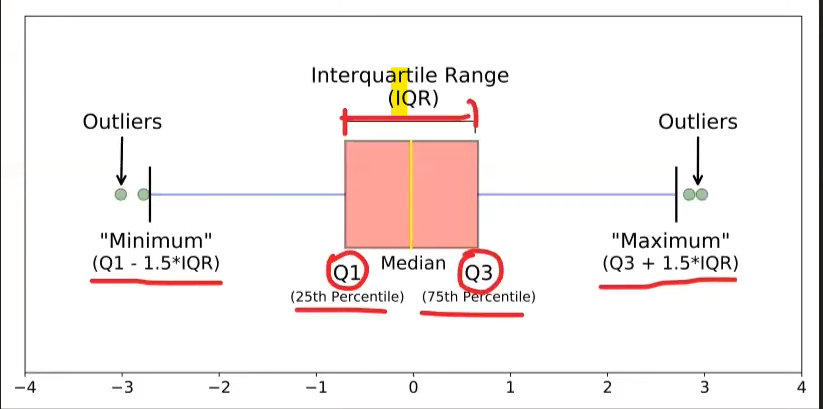



   3.  others distribution:  


if outliers more than 97.5 percentile and less than 2.5 percentile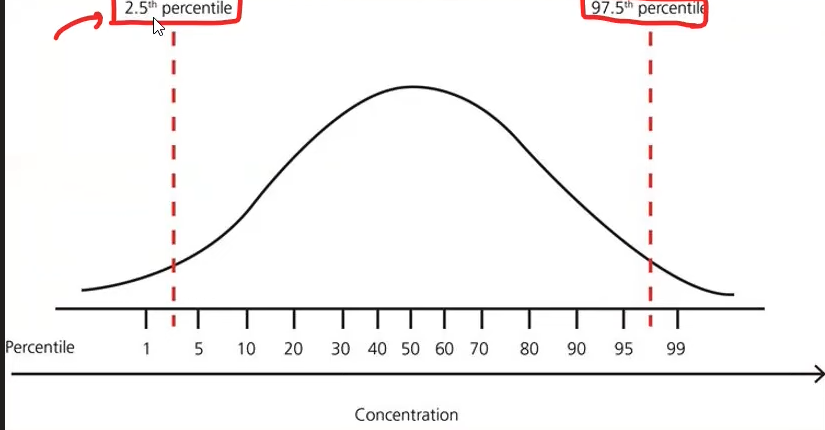




# TECHNIQUES FOR OUTLIERS DETECTTION.

1. Z score treatment

2. IQR based fitting

3. Percentile

4. Winsorization

# Outlier detection using Z- Score

**The Z-score tells us how far a data point is from the mean, measured in standard deviations.

Z-score
 x-μ/ σ


Where:


x = data point


μ = mean of the dataset


σ = standard deviation



When is a Point an Outlier?

A data point is usually considered an outlier if:

∣
𝑍
∣
>
3
∣Z∣>3

📌 Meaning:

Z > +3 → unusually high value

Z < −3 → unusually low value

(For strict datasets, sometimes |Z| > 2.5 is also used)



Trimming means removing data points that lie beyond a chosen threshold


Capping replaces outliers with the nearest acceptable boundary value, instead of removing them.**

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

df = pd.read_csv('/content/placement.csv')

In [ ]:
df.shape


(1000, 3)

In [ ]:
df.sample(5)


/tmp/ipython-input-3792736820.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
/tmp/ipython-input-3792736820.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


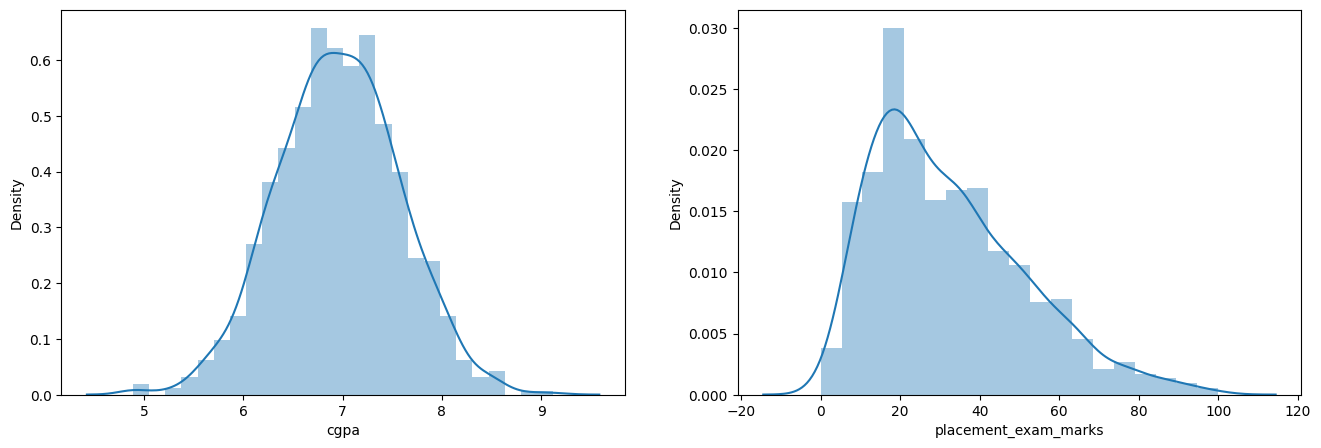

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [ ]:

df['placement_exam_marks'].skew()

np.float64(0.8356419499466834)

In [ ]:

print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323894
Min value of cgpa 4.89
Max value of cgpa 9.12


In [ ]:

# Finding the boundary values
print("Highest allowed",df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [ ]:
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]


,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [ ]:
new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [ ]:

# Approach 2

# Calculating the Zscore

df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [ ]:

df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [ ]:

df[df['cgpa_zscore'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [ ]:

df[df['cgpa_zscore'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [ ]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]


,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [ ]:
# Trimming
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]

In [ ]:

new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


# Capping

In [ ]:

upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [ ]:

lower_limit

np.float64(5.113546374602832)

In [ ]:

df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [ ]:

df.shape

(1000, 4)

In [ ]:

df['cgpa'].describe()

,cgpa
count,1000.000000
mean,6.961499
std,0.612688
min,5.113546
25%,6.550000
50%,6.960000
75%,7.370000
max,8.808934


## Outlier detection and removal using IQR method


used when data is skewely distributed.

  